<a href="https://colab.research.google.com/github/RITABRITA-0407/Prediction/blob/main/Prediction_of_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Predict House Prices (California Housing Dataset)
Goal: Predict median home prices in California using linear regression.

In [ ]:
pip install pandas scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd # Data handling
import numpy as np # Numerical operations
import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Statistical plotting
from sklearn.model_selection import train_test_split # For splitting data
from sklearn.linear_model import LinearRegression # The ML model
from sklearn.metrics import mean_squared_error, r2_score # Evaluation metrics
from sklearn.datasets import fetch_california_housing # Dataset

In [ ]:
housing = fetch_california_housing() # NOTE: In future versions of scikit-learn this may be

In [ ]:
# Convert to pandas DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names) # Features
df['PRICE'] = housing.target # Add the target variable (median home price)

In [ ]:
# Display the first few rows of the dataset
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


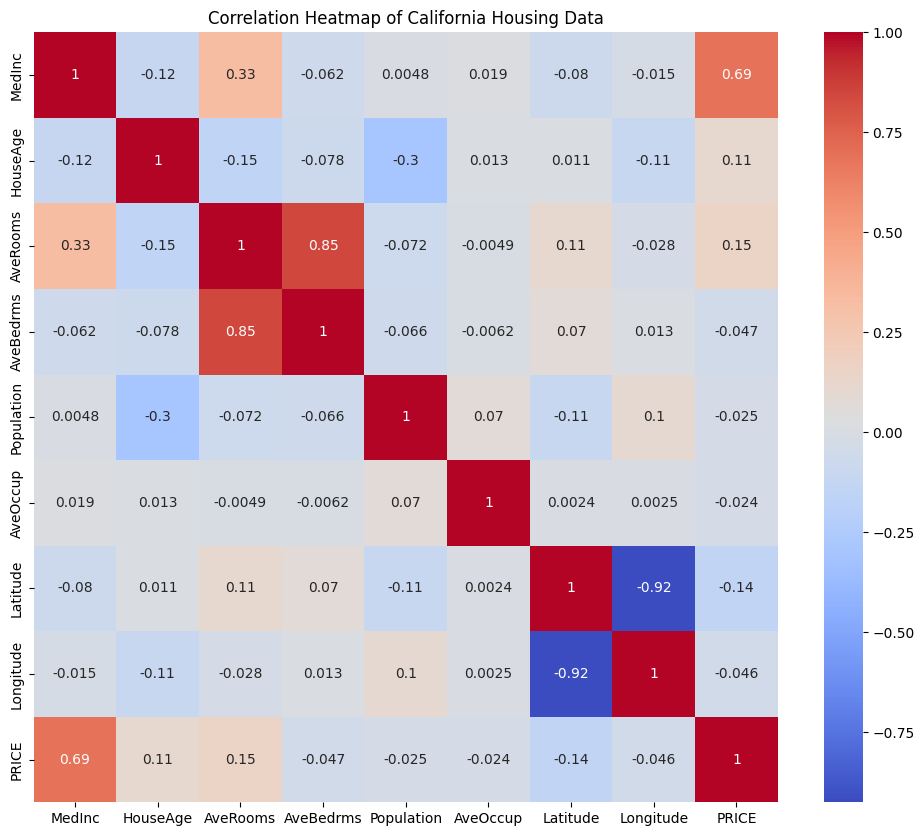

In [ ]:
# View correlations between variables
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of California Housing Data")
plt.show()

In [ ]:
# Select feature and target
X = df[['AveRooms']] # Feature: average number of rooms
y = df['PRICE'] # Target: median home price
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42 # 80% train, 20% test
)


In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Print the learned parameters
print("Model Coefficient (slope):", model.coef_)
print("Model Intercept (bias):", model.intercept_)

Model Coefficient (slope): [0.07675559]
Model Intercept (bias): 1.6547622685968417


In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)
# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 1.2923314440807299
R² Score: 0.013795337532284901


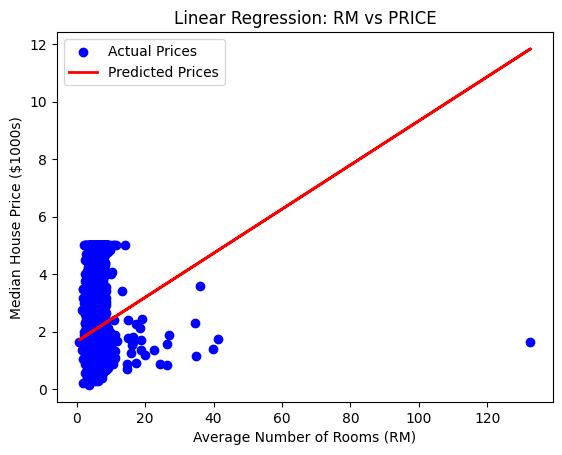

In [ ]:
# Plot the regression line and test data
plt.scatter(X_test, y_test, color='blue', label='Actual Prices') # Actual pri
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median House Price ($1000s)')
plt.title('Linear Regression: RM vs PRICE')
plt.legend()
plt.show()
